# **Practica 1**
#### _Alberto García Doménech - Pablo Daurell Marina_ (Grupo 10)
***

## Parte 1 (Clustering)

In [1]:
import pandas as pd

In [2]:
# Cargamos el archivo csv
data = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
# Eliminamos la variable UrbanPop ya que no la usaremos para el clustering
data = data.drop(columns={'UrbanPop'})

#### 1) Descripción del conjunto de datos:
**Nombre:** USArrest   
**Descripción:** Causas de arrestos en cada estado de Estados Unidos en 1973   
**Tipos de cada variable:**

In [4]:
# Nombre y tipos de variables
data.dtypes

Murder     float64
Assault      int64
Rape       float64
dtype: object

**Estadisticos de cada variable:**

In [5]:
# Estadísticos de cada variable 
data.describe()

,Murder,Assault,Rape
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000


**Correlación de las variables:**

In [6]:
data.corr()

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


Podemos ver que el asalto y el asesinato están bastante relacionados entre sí, mientras que la violación no está tan relacionada con el asalto y el asesinato.

**Distribución de las variables:**

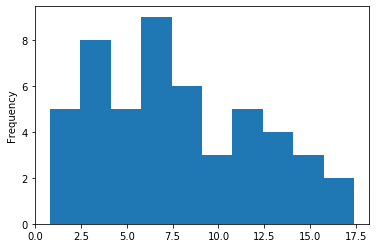

In [8]:
# MURDER:
data["Murder"].plot.hist()

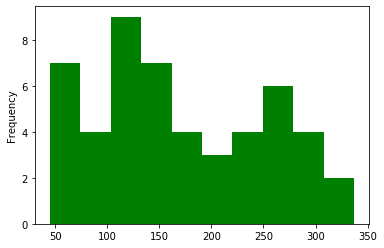

In [9]:
# ASSAULT:
data["Assault"].plot.hist(color='g')

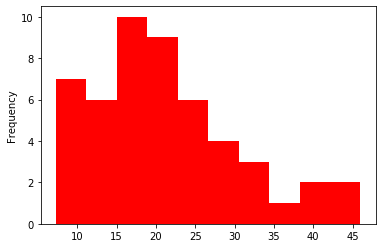

In [10]:
# RAPE
data["Rape"].plot.hist(color='r')

#### 2) Reescalar las variables:

In [7]:
data.head()

,Murder,Assault,Rape
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6


Arriba podemos ver que los valores de la variable Assault son bastante más grandes que los valores de Murder y Rape, por tanto nos convendría igualar algo más los datos reescalando las variables.

Utilizamos el ```StandardScaler``` de _sklearn_ que resta a cada variable su media y la divide entre la desviación típica, obteniendo así un nuevo dataframe con todos los datos reescalados y más similares entre sí.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data=x, index=data.index, columns={'Murder', 'Assault', 'Rape'})

In [9]:
data_scaled.head()

,Murder,Assault,Rape
Alabama,1.255179,0.790787,-0.003451
Alaska,0.513019,1.118060,2.509424
Arizona,0.072361,1.493817,1.053466
Arkansas,0.234708,0.233212,-0.186794
California,0.281093,1.275635,2.088814


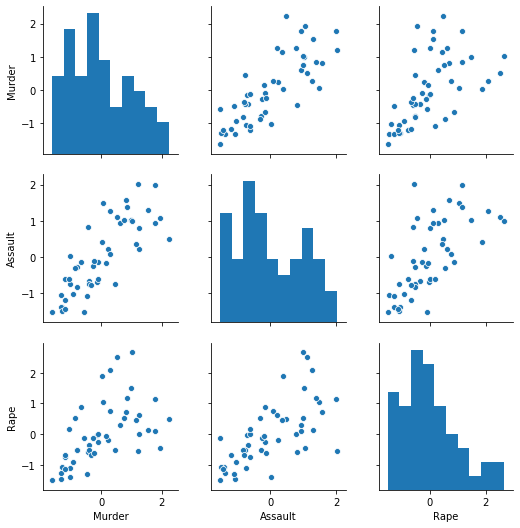

In [11]:
import seaborn as sns

sns.pairplot(data_scaled)

#### 3) K-Means 

Vamos a aplicar el algoritmo K-Means para agrupar nuestros datos en varios clusters.   
Como no sabemos que valor de K puede ser el más óptimo para nuestro conjunto de datos vamos a repetir el algoritmo con distintos valores de K, calculando para cada valor el índice de Davies-Boulding y eligiendo la K que minimice el valor del índice de Davies-Boulding.

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

In [13]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)

for k in range(2, K_MAX):
    # Crea una instancia de K-Means
    km = KMeans(init='random', n_clusters=k, random_state=333)
    # Agrupa los datos en clusters
    km.fit(data_scaled)
    # Calcula el indice de Daves-Bouldin para cada valor de K
    davies_boulding[k-2] = davies_bouldin_score(data_scaled, km.labels_)

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

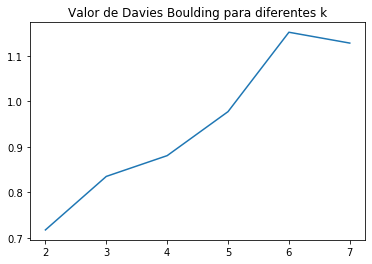

In [14]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

- En la gráfica observamos que el mínimo valor lo obtenemos para K = 2. Por tanto agruparemos nuestros datos en dos clusters distintos.

Repetimos el algoritmo K-Means, esta vez con K = 2 y visualizamos como quedan agrupados los datos en cada cluster:

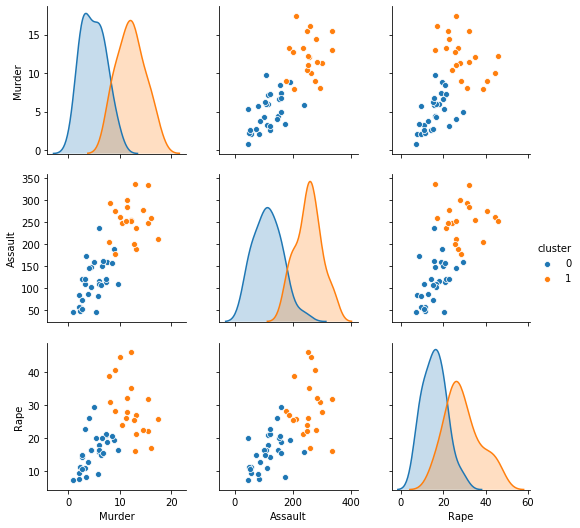

In [19]:
## K-Means con dos clusters
km2 = KMeans(init='random', n_clusters=2, random_state=333)
km2.fit(data_scaled)

# Visualizar los datos agrupados
data_clusters = data
data_clusters['cluster'] = km2.labels_
sns.pairplot(data_clusters, vars={'Murder', 'Assault', 'Rape'}, hue='cluster')

In [18]:
centers = km2.cluster_centers_
centers

array([[-0.67675778, -0.68274685, -0.57037591],
       [ 1.01513667,  1.02412028,  0.85556386]])